<a href="https://colab.research.google.com/github/erin5116/phys5020_intr_to_itk/blob/main/phys5020_intro_to_itk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to (simple) ITK</h1>


## Setup: Importing the required libraries ##

First step in a Python script is to import the libraries with the functions that you want to use.

In this tutorial we will use the following libraries:


1.   SimpleITK: image registration and segmentation library
2.   Numpy: library with mathematical functions
3. Matplotlib: library for creating visualisations in Python, we will use the Pyplot function in this tutorial to show the images

Run the cell below to import the first two libraries and the plotting function


In [9]:
import numpy as np
from matplotlib import pyplot as plt
import SimpleITK

Here you should encounter an error message.

This is because numpy and matplotlib libraries are pre-installed in Google Collab (and probably most Python installations) but SimpleITK is not.

As Google Collab does not have SimpleITK pre-installed, we need to do it ourselves as the first step in this tutorial

In [10]:
pip install SimpleITK

Now, you should be able to import SimpleITK.

Click into the next cell to type the code to import the library and giving it a short variable (sitk)

In [11]:
# import the library and giving it a short variable (sitk)
import SimpleITK as sitk

## Working with single images ##

Here you will read in the simpleITK logo using the sitk function.
It is located in the '/data' folder in your current working directory.

Note: in Google Collab, the current working directory is '/content', and the following cell will download the data required for this lab into '/content/phys5020_intro_to_itk/data'

In [12]:
# clone github repository containing the data, comment out if you downloaded the data and have it in your path
# !git clone https://github.com/erin5116/phys5020_intro_to_itk

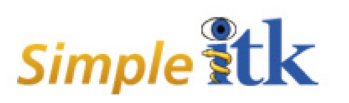

In [13]:
path = '/content/phys5020_intro_to_itk/data'
path = 'data'
# insert code to read the image 'SimpleITK.jpg'
logo = sitk.ReadImage(path+'/SimpleITK.jpg')

# this code plots/visualises the image
plt.imshow(sitk.GetArrayViewFromImage(logo)) # gets the numpy array from the image to plot it (visualisation)
plt.axis('off');

## Retrieve image spatial information ##

Fill in the blanks below to retrieve some basic image spatial information.

Hint: use {image}.Get{parameter}() to obtain the Origin, Size, Direction, and PixelIDTypeAsString

In [14]:
# insert code to find out where the origin of the image is
logo.GetOrigin() 

(0.0, 0.0)

In [15]:
# insert code to find out what the size of the image is
logo.GetSize() 

(200, 53)

In [16]:
# insert code to find out where the image resoluation (pixel spacing) of the image is
logo.GetSpacing() 

(1.0, 1.0)

In [17]:
# insert code to find out what the direction of the image is
logo.GetDirection() 

(1.0, 0.0, 0.0, 1.0)

In [18]:
# insert code to find out what is the image pixel type
logo.GetPixelIDTypeAsString() 

'vector of 8-bit unsigned integer'

## Play around with the image! ##

Use the cell below to play around with the image using basic array operations.

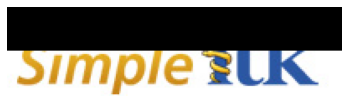

In [19]:
# replace the bottom half of the image (hint: rows and columns start counting from the top left corner) with 0s
logo_temp = logo[:,:]
logo_temp[:,0:26]=0 # insert code here

plt.imshow(sitk.GetArrayViewFromImage(logo_temp)) # gets the numpy array from the image to plot it (visualisation)
plt.axis('off');

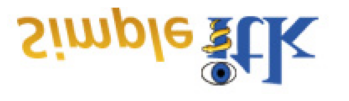

In [20]:
# flip the whole image
logo_temp = logo[:,:]
logo_temp= logo_temp[:,53:0:-1] # insert code here

plt.imshow(sitk.GetArrayViewFromImage(logo_temp)) # gets the numpy array from the image to plot it (visualisation)
plt.axis('off');

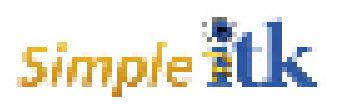

In [21]:
# "brute" downsample the image by factor of 3
logo_temp = logo[:,:]
logo_temp= logo_temp[0:200:3,0:53:3] # insert code here

plt.imshow(sitk.GetArrayViewFromImage(logo_temp)) # gets the numpy array from the image to plot it (visualisation)
plt.axis('off');

## Working with a series of 2D images ##

Playing with a single image is fun, but in the clinical setting you usually deal with image volumes that are saved as a series of 2D images, often in DICOM format.

Here you will learn how to read a series of DICOM images from a clean folder (only contains one sequnece per folder).

Use the cell below to read in the dicom series from /data/dicom_abdominal_phantom using the ImageSeriesReader

In [22]:
path = 'data/dicom_abdominal_phantom'

# insert code here to read in series of 2D images
# hint: assign the reader to a variable
reader = sitk.ImageSeriesReader()
files = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(files)
image = reader.Execute()

## Retrieve image spatial information ##

As you did in the section above, retrieve the spatial information of the image

In [23]:
# insert code to find out where the origin of the image is
image.GetOrigin() 

(-169.73314094543, -113.15226173401, -198.53119676374)

In [24]:
# insert code to find out what the size of the image is
image.GetSize() 

(320, 240, 352)

In [25]:
# insert code to find out where the image resoluation (pixel spacing) of the image is
image.GetSpacing() 

(1.1875, 1.1875, 1.0)

In [26]:
# insert code to find out what the direction of the image is
image.GetDirection() 

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [27]:
# insert code to find out what is the image pixel type
image.GetPixelIDTypeAsString() 

'16-bit unsigned integer'

How does the information compare with the simpleITK logo?

## Visualise the image volume ##

As we are working on the cloud with Google Collab today, we won't be able to easily use other softwares to visualise the data. 

Instead, we can use the old fasioned way as in the section above - use pyplotlib to visualise slice by slice.

Use the code in the above section to guide you on how to visualise just one slice in the image volume, starting with the center slice (middle slice in the z axis).


Hint: use your knowledge on array operation to pull just one slice of the image. Do it before you use imshow.

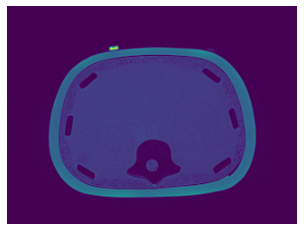

In [28]:
# insert code to pull a slice from the image volume and display it
image_slice = image[:,:,200]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

You can use this code to explore and visualse the different slices in this image volume. 
The phantom object in this image starts around slice 115 and ends around 250.

## Segmentation using thresholding ##


Let's try out doing a simple segmentation of the image to obtain a mask of the entire phantom.
A mask typically is a binary image, with the voxels in the object/region of interest having a value of 1 and the background of 0.

Hint: the background noise is around 30 a.u., so use that as your threshold.

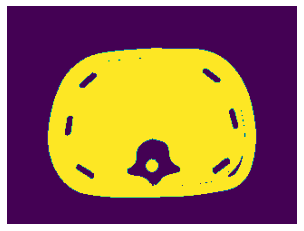

In [29]:
# insert code here for thresholding of the image 
image_thresholded = image>30 

# insert code here to pull a slice from the thresholded image volume and display it
image_slice = image_thresholded[:,:,176]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

Next, try the threshold segmentation with a lower threshold than u used above, e.g. 5 a.u. and visualise slice 176 again

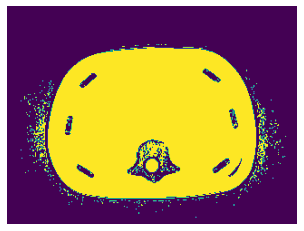

In [30]:
# insert code here for thresholding of the image
image_thresholded = image>5 

# insert code here to pull a slice from the thresholded image volume and display it
image_slice = image_thresholded[:,:,176]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

What differences do you see?
This is an example of the importance of the threshold value when using it in object segmentation.
Manual selection of the thresold (and maybe a bit of trial and error) works, but different images can have different background values, so you don't want to be doing this manually all the time!

Next, we will try an auto-thresholding algorithm (Otsu Threshold Algorithm original paper [here](https://ieeexplore.ieee.org/document/4310076)).

Run the cell below to see the Otsu threshold filter at work!



76.0


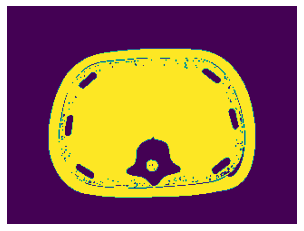

In [31]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
image_thresholded_otsu = otsu_filter.Execute(image)

print(otsu_filter.GetThreshold())

image_slice = image_thresholded_otsu[:,:,176]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

How does the result compare with the manually selected threshold value?

Note: look at how the image filter is used. It may be useful in later exercises :)

## Working with label maps ##

Thresholding of the image with the filter results in a binary image.

Use the LabelShapeStatisticsImageFilter to extract:

1) The number of label objects

2) Size of each label object (hint: use GetPhysicalSize)

3) Bounding box of the largest object

Hint: use {function}.Get{parameter}() to extract the Labels, PhysicalSize, and BoundingBox. For the latter two, you need to specify which label you want to obtain the information for.

In [32]:
# insert code here to use the LabelShapeStatisticsImageFilter on the image thresholded using the otsu algorithm
label_shapes = sitk.LabelShapeStatisticsImageFilter()
label_shapes.Execute(image_thresholded_otsu)

# insert code here to print the parameters
print(label_shapes.GetLabels())
print(label_shapes.GetPhysicalSize(1))
print(label_shapes.GetBoundingBox(1))

(1,)
4205018.25
(45, 41, 105, 230, 171, 159)


Question: Do you know what units the size of the label region is in?

## Reading DICOM from a folder with mixed data ##

Now that you've experienced reading a series of 2D DICOM images from one folder, let's move onto something more challenging.

Sometimes the clinical scanners export all image data into one single folder, which can be difficult to sort.

Lucky for us, the image series reader in SITK can be used to obtain all the series ID, which is unique to each series, so we can get a quick feel for how many series are in the folder.

Run the following cell and fill in the blanks to assess the series ID of the DICOM files in the folder '\dicoms'

In [33]:
path = 'data/dicoms'

# insert code here to assign the ImageSeriesReader to a variable and obtain the dicom series ID 
# hint: GDCMSeriesIDs
reader = sitk.ImageSeriesReader()
series_IDs = reader.GetGDCMSeriesIDs(path)
print(series_IDs)


('1.2.840.113619.2.290.3.3233817346.783.1399004564.515', '1.3.12.2.1107.5.2.43.166029.2021031810142178388979917.0.0.0')


The series ID doesn't provide a whole lot of information about the image, but is useful if you know the ID of the series that you want to read, or can be used to sort the folder (by moving all the 2D DICOMs into different folders, one for each series).

For now, let's practice reading a series by specifying its' seriesID

In [34]:
# insert code here to read the first series in the folder as a 3D image volume
files = reader.GetGDCMSeriesFileNames(path,series_IDs[0])
reader.SetFileNames(files)
image = reader.Execute()

image.GetSize()

(512, 512, 283)

Next, show the middle slice of the image to have a look at what it is.

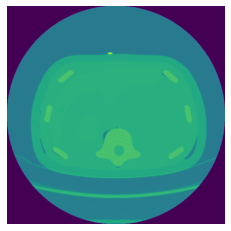

In [35]:
# insert code here to find out the middle slice of the image, extract it, and plot
image_slice = image[:,:,141]

plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

## Extracting DICOM headers ##

Now we are familiar with reading in single and series of images, let's have a look at how we can extract the DICOM headers from the image, which can be useful for our work, e.g. MRI acquisition parameters for mathematical modelling.

### Single 2D image ###

Let's use the second series in the folder to have a look at how we can quickly extract the DICOM header from a single DICOM file.

First, read the first image from the second series.

In [36]:
# insert code here to read the first series in the folder
files = reader.GetGDCMSeriesFileNames(path,series_IDs[1])
single_dicom_img = sitk.ReadImage(files[0])

Next, extract the Protocol Name ('00108|1030') from the DICOM header.

Hint: use {image}.Get{parameter}({dicom_tag}) to get the MetaData.

In [37]:
# insert code to get meta data from the image
single_dicom_img.GetMetaData('0018|1030')

'ACR_t2_me_20-80ms_5mm '

Next, let's practice our skills in looping things in Python.

Loop through the list of series IDs (from the previous exercise), load the first image, and print the Protocol Name for that series.

In [38]:
# insert code here to loop through series and print protocol name
for each_series in series_IDs:
    files = reader.GetGDCMSeriesFileNames(path,each_series)
    single_dicom_img = sitk.ReadImage(files[0])
    print(single_dicom_img.GetMetaData('0018|1030'))

16.8.1 ABDOMEN 31.5-40.5KG
ACR_t2_me_20-80ms_5mm 


This is something that might come in handy in a clinical setting, especially if you have many series of images all saved into one folder.

### Series of 2D images ###

Extracting the DICOM header for a series of 2D images is slightly different.

By default, the ImageSeriesReader does not read in the DICOM tags to save time when reading a large number of 2D images.

You can turn this on by setting the MetaDataDictionaryArrayUpdateOn in the reader.

In [39]:
# insert code to turn the dicom header reading on and execute the reader function
reader = sitk.ImageSeriesReader()
reader.MetaDataDictionaryArrayUpdateOn()
files = reader.GetGDCMSeriesFileNames(path,series_IDs[1])
reader.SetFileNames(files)
image = reader.Execute()

Next, extract the protocol name from the reader function, from the first slice.

Hint: use {function}.Get{parameter}({slice_number},{dicom_tag}) to get the MetaData.

In [40]:
# insert code to get meta data from the reader for the first slice
reader.GetMetaData(0,'0018|1030')

'ACR_t2_me_20-80ms_5mm '

## Applying denoising filters in SITK ##

The first slice in the ACR phantom is useful to evaluate image resolution, and also the effect of denoising filters on the image quality.

Try apply the DiscreteGuassianImageFilter and view the image.

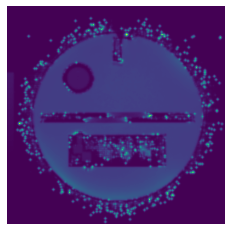

In [41]:
# insert code to apply the DiscreteGaussianImageFilter to the image
gaussian_filter = sitk.DiscreteGaussianImageFilter()
image_gauss = gaussian_filter.Execute(image)

# insert code here to plot and visualise the first slice in the filtered image
image_slice = image_gauss[:,:,0]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

Show the original image and compare

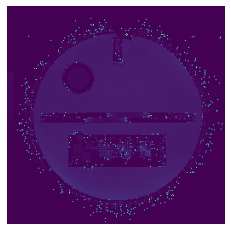

In [42]:
# insert code here to plot and visualise the first slice in the unfiltered image
image_slice = image[:,:,0]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

Try the median image filter and see how that helps with the noise outside the phantom

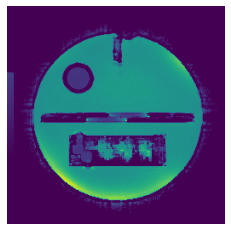

In [43]:
# insert code to apply the MedianImageFilter to the image
med_filter = sitk.MedianImageFilter()
image_med = med_filter.Execute(image)

# insert code here to plot and visualise the first slice in the filtered image
image_slice = image_med[:,:,0]
plt.imshow(sitk.GetArrayViewFromImage(image_slice)) 
plt.axis('off');

## Converting between Numpy and SITK ##

While the SITK image object is great to work with, it is limited to the tools and functions within the libary (for now?!).

On the other hand, numpy arrays are well integrated into a number of other useful libraries, or can be used on its own.

Let's convert the image volume of the phantom object into numpy and play around with it.

In [44]:
# insert code here to convert sitk image to numpy array
nda = sitk.GetArrayFromImage(image)

Try to plot the same slice (first slice) as you did in the above exercise.

Hint: Beware of the order of axes

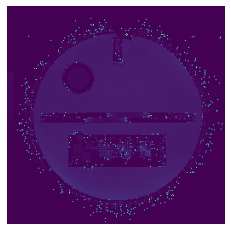

In [45]:
# insert code to plot the 1st slice
plt.imshow(nda[0,:,:]) 
plt.axis('off');

Next, let's go to the sixth slice in the image volume, which we will use for the next exercise.

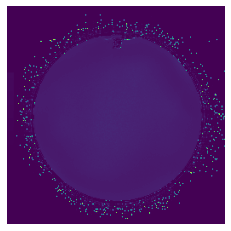

In [46]:
# insert code to plot the 6th slice
plt.imshow(nda[5,:,:]) 
plt.axis('off');

## Simple SNR measurment with Numpy array ##


In the previous exercise you should see a uniform part of the phantom, where we can estimate the SNR inside.

Use your knowledge with numpy arrays to select a square of 10 x 10 voxels around the centre of the image on slice 6

In [47]:
# insert code here to select 10 x 10 voxels around the centre of slice 6
nda.shape

centre_y = nda.shape[1]/2
centre_x = nda.shape[2]/2

print(centre_y,centre_x)

nda_centre = nda[5,120-5:120+5,120-5:120+5]
print(nda_centre.shape)

128.0 128.0
(10, 10)


Then estimate the SNR (mean / std) from the center cube 

In [48]:
# insert code here to calculate and print the SNR value
snr = np.mean(nda_centre)/np.std(nda_centre)
print(snr)

21.17487244994695


## Thresholding with numpy, and convert back to SITK ##

For the last exercise of today, let's threshold the phantom image in Numpy and convert it back into an SITK image. 

Use your knowledge on the signal intensity in the phantom (hint, the maximum value in the centre of slice 6 is a good estimate of the upper threshold, play around with the image to select a reasonable lower threshold) to manually threshold the image.

In [49]:
# insert code here to find the range of values in the centre of slice 6
print(np.min(nda_centre),np.max(nda_centre))

364 460


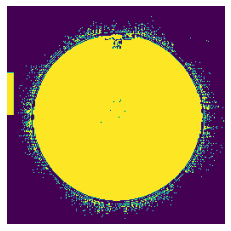

In [50]:
# insert code here to thershold the image
nda_thresh = np.zeros(nda.shape)
nda_thresh[(nda>50) & (nda<460)]=1

# insert code here to plot the thresholded image and examine whether the threshold values are reasonable
plt.imshow(nda_thresh[5,:,:]) 
plt.axis('off');

Convert the thresholded image back to a SITK image, and remember to copy the image spatial information so it matches with the original image.

In [51]:
# insert code here to convert the numpy array back into sitk image
image_label = sitk.GetImageFromArray(nda_thresh)

print(image_label)

# insert code here to copy the spatial information from the original image
image_label.CopyInformation(image)

print(image_label)

Image (000002AC91A66690)
  RTTI typeinfo:   class itk::Image<double,3>
  Reference Count: 1
  Modified Time: 139079
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 11]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 11]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 11]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000002AC8CDFACE0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,double>
      Reference Count: 1
      Modified Time: 139080
   

This is the end of the tutorial :)

Hope you enjoyed it and learned something useful!